Challenge_1: Aerial Cactus-AML

In [164]:
# Imports
%reset -f
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import wandb
from customDatasets.CactusDataset import CactusDataset
from models.CactusResNet50 import CactusModel
from torch.utils.data import ConcatDataset

In [165]:
log = False
# free gpu
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Phase 1: Loading the data, analyzing it, doing feature engineering and creating the Loader

In [166]:
# load data for displaying
dataset=CactusDataset(root_dir='./data/train/train',labels_path='./data/train.csv')
# take the first sample from train_dataloader
_, train_features, train_labels = dataset[0]
image_np = np.array(train_features)
print("Image shape: "+str(image_np.shape))
print("Image python class"+str(type(train_features)))
print("Label: "+str(train_labels))

Image shape: (32, 32, 3)
Image python class<class 'PIL.JpegImagePlugin.JpegImageFile'>
Label: 1


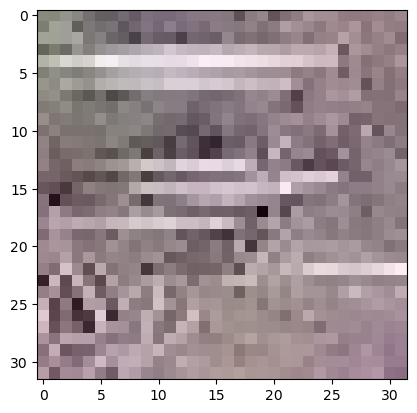

In [167]:
# show the image
plt.imshow(image_np)

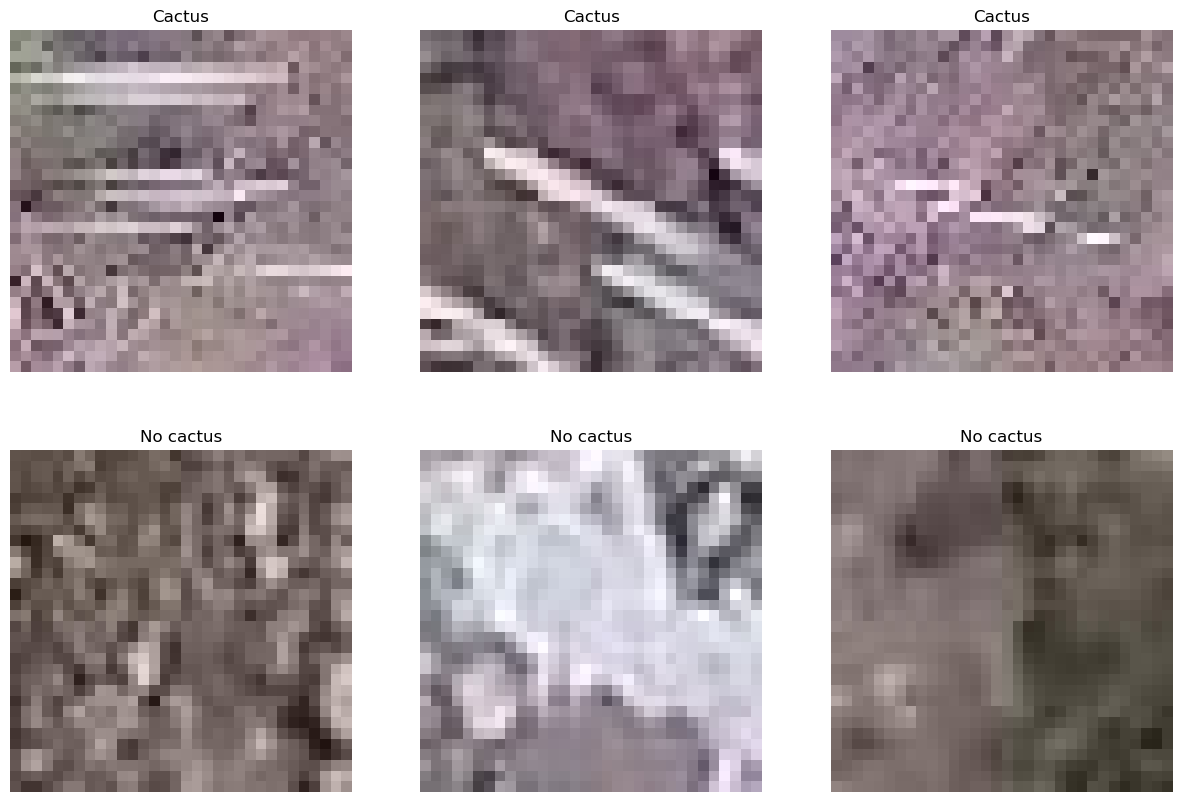

In [168]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

# Define a transformation to convert PIL image to PyTorch tensor
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

cactus_images = []
no_cactus_images = []
for i in range(len(dataset)):
    _, image, label = dataset[i]
    # Apply the transformation to convert PIL image to PyTorch tensor
    image = transform(image)
    if label == 1 and len(cactus_images) < 3:
        cactus_images.append((image, 1))
    elif label == 0 and len(no_cactus_images) < 3:
        no_cactus_images.append((image, 0))
    if len(cactus_images) == 3 and len(no_cactus_images) == 3:
        break

# Concatenate the vectors
images = cactus_images + no_cactus_images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (image, label) in enumerate(images):
    ax = axes[i // 3, i % 3]
    # Convert the PyTorch tensor back to numpy array and permute dimensions
    ax.imshow(image.permute(1, 2, 0).numpy())
    ax.set_title('Cactus' if label == 1 else 'No cactus')
    ax.axis('off')
plt.show()



[4364, 13136]


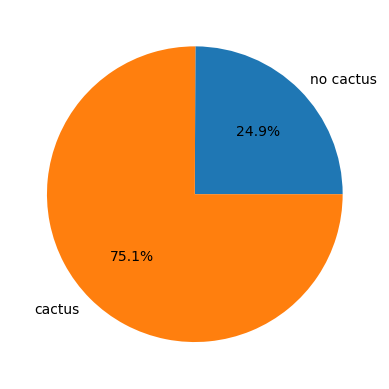

In [169]:
def get_label_distribution(data):
    label_counts = {}
    for _, _, label in data:
        if label not in label_counts:
            label_counts[label] = 0
        label_counts[label] += 1
    sorted_distribution = sorted(label_counts.items(), key=lambda x: x[0])
    # take only the count
    return [x[1] for x in sorted_distribution]
label_distribution = get_label_distribution(dataset) # they are sorted in ascending order
print(label_distribution)
fig, ax = plt.subplots()
ax.pie(label_distribution, labels=['no cactus','cactus'], autopct='%1.1f%%')
plt.show()

torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 1024])
torch.Size([3, 1024])


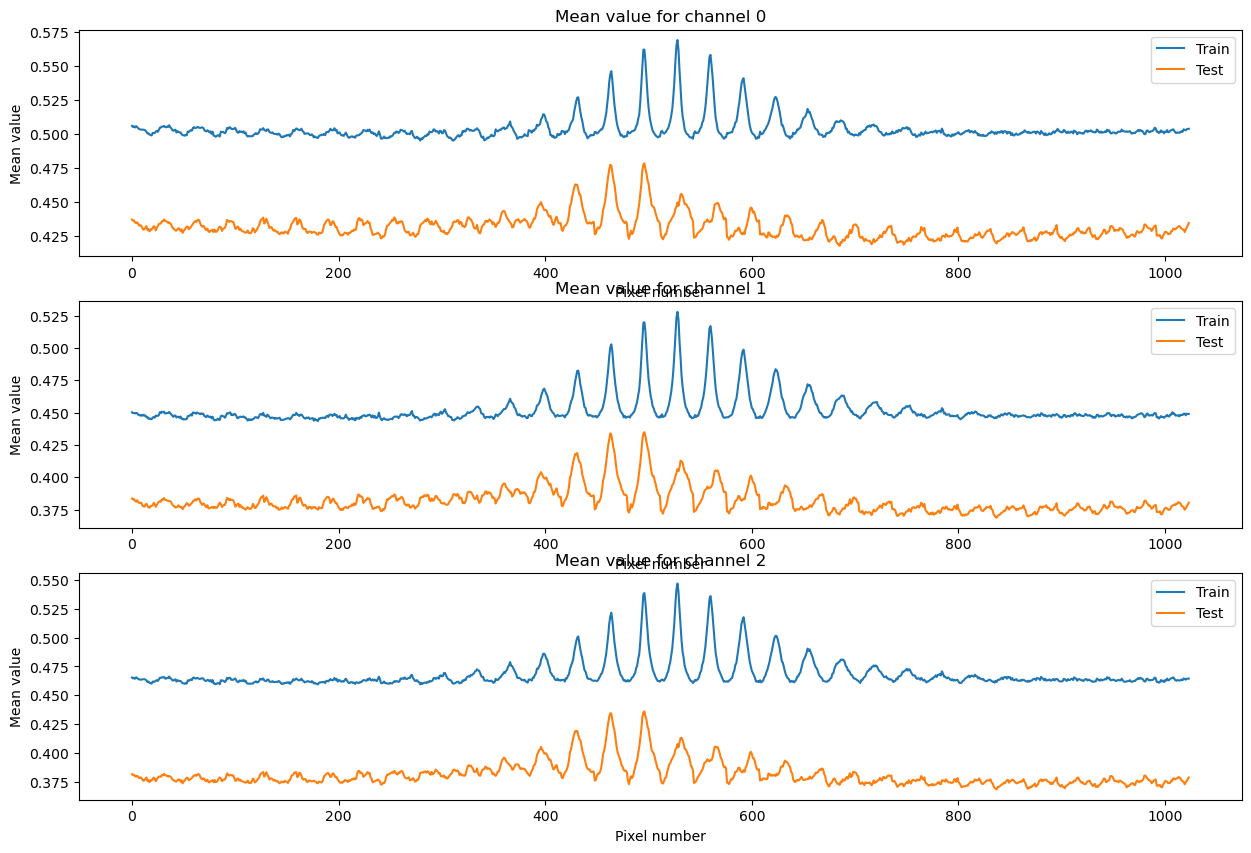

In [172]:
# Define the transformation
transform = transforms.Compose([transforms.ToTensor()])

# Load the test dataset
test_dataset = CactusDataset(root_dir='./data/test/test', labels_path=None, transform=transform)

# Create the data loader for the test dataset
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load the training dataset
dataset = CactusDataset(root_dir='./data/train/train', labels_path='./data/train.csv', transform=transform)

# Create the data loader for the training dataset
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

# Compute the average value for each channel and for each pixel in the training set
mean_train = torch.zeros(3, 32, 32)
for _, images, _ in dataloader:
    mean_train += images.mean(dim=0)
mean_train /= len(dataloader)

# Compute the average value for each channel and for each pixel in the test set
mean_test = torch.zeros(3, 32, 32)
for _, images, _ in test_dataloader:
    mean_test += images.mean(dim=0)
mean_test /= len(test_dataloader)

print(mean_train.shape)
print(mean_test.shape)

# flatten dimensions 2 and 3
mean_train = mean_train.flatten(1, 2)
mean_test = mean_test.flatten(1, 2)

print(mean_train.shape)
print(mean_test.shape)

# create a plot for each channel and put in it x=pixel number and y=value taken from main_train and test_train using histograms
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
for i in range(3):
    ax[i].plot(mean_train[i], label='Train')
    ax[i].plot(mean_test[i], label='Test')
    ax[i].set_title(f'Mean value for channel {i}')
    ax[i].set_xlabel('Pixel number')
    ax[i].set_ylabel('Mean value')
    ax[i].legend()

In [ ]:
print("Number of train values: "+str(dataset.__len__()))

In [ ]:
transform_dataset = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

dataset = CactusDataset(root_dir="./data/train/train",labels_path="./data/train.csv",transform=transform_dataset)
_, image, label = dataset[0]
print("Image python class"+str(type(image)))
print("Image shape: "+str(image.shape))
print("Label shape: "+str(label))
# show the image
plt.imshow(image.permute(1,2,0))

In [ ]:
dataloader=DataLoader(dataset,batch_size=32,shuffle=True)

In [ ]:
for i, (img_name, images, labels) in enumerate(dataloader):
    print("Batch number: "+str(i))
    print("Batch image names: "+str(img_name))
    print("Batch images shape: "+str(images.shape))
    print("Batch labels shape: "+str(labels.shape))
    break

In [ ]:
# select a few samples from the dataset in order to have 3 cactus and 3 no cactus images
cactus_images = []
no_cactus_images = []
for i in range(len(dataset)):
    _, image, label = dataset[i]
    if label == 1 and len(cactus_images) < 3:
        cactus_images.append((image,1))
    elif label == 0 and len(no_cactus_images) < 3:
        no_cactus_images.append((image,0))
    if len(cactus_images) == 3 and len(no_cactus_images) == 3:
        break
# concatenate the vectors
images = cactus_images + no_cactus_images
'''
from models.LLM import LLM
labeling_model = LLM()
# load the test dataset
test_dataset = CactusDataset(root_dir='./data/test/test', labels_path=None)
# create the data loader
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
values=labeling_model.generate_labels(images, test_dataloader)
print(values)
'''

In [ ]:
# --------- DATA AUGMENTATION ---------
# filter the dataset to only have no cactus images
dataset = CactusDataset(root_dir="./data/train/train",labels_path="./data/train.csv",transform=transform_dataset)
no_cactus_dataset = dataset.filter(0)
# create a concatenated dataset with an equal number of cactus and no cactus images
print("Number of no cactus images: "+str(no_cactus_dataset.__len__()))
print("Number of cactus images: "+str(dataset.__len__()-no_cactus_dataset.__len__()))
def compute_mean_std(dataset):
    mean = 0.
    std = 0.
    for _, images, _ in dataset:
        mean += images.mean()
        std += images.std()
    mean /= len(dataset)
    std /= len(dataset)
    return mean, std
mean, std = compute_mean_std(ConcatDataset([dataset, no_cactus_dataset, no_cactus_dataset]))
print("Mean: "+str(mean))
print("Std: "+str(std))
# load test_dataset and we do the same
mean_test, std_test = compute_mean_std(CactusDataset(root_dir="./data/test/test",labels_path=None,transform=transform_dataset))
print("Mean test: "+str(mean_test))
print("Std test: "+str(std_test))

In [ ]:
merged_dataset_transforms=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

dataset=CactusDataset(root_dir="./data/train/train",labels_path="./data/train.csv",transform=merged_dataset_transforms)
no_cactus_dataset=dataset.filter(0)
dataset_merged=ConcatDataset([dataset,no_cactus_dataset,no_cactus_dataset])

In [ ]:
# --------- CREATING THE DATA LOADER AND TRAIN/VAL SPLIT ---------
torch.manual_seed(42)
dataset_used=dataset_merged
train_size = int(0.8 * len(dataset_used))
print("Train size: " + str(train_size))
test_size = len(dataset_used) - train_size
print("Test size: " + str(test_size))
train_dataset, val_dataset = torch.utils.data.random_split(dataset_used, [train_size, test_size])

# Retrieve the lengths of the datasets
print("dataset length: " + str(len(dataset_used)))


# Create DataLoader for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True,pin_memory=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True,pin_memory=True)
#print a sample
_, image,label=dataset_used.__getitem__(0)
print("Image shape: "+str(image.shape))
print("Label shape: "+str(label))


 # Phase 2: defining the model

In [ ]:
if log:
    # setting wandb
    wandb.login()

In [ ]:
if log:
    # start a new wandb run to track this script
    wandb.init(
        # set the wandb project where this run will be logged
        project="Challenge_1",
    
        # track hyperparameters and run metadata
        config={
        "architecture": "ResNet50_FineTuned",
        "dataset": "Cactus",
        "freeze_epochs": 1,
        "freeze_learning_rate": 0.01,
        "epochs": 15,
        "learning_rate": 0.001,
        "batch_size": 32,
        }
    )

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CactusModel()
model.to(device)
print(model)

In [ ]:
# train the model
import os
if log:
    # Create DataLoader for training and validation
    train_dataloader = DataLoader(train_dataset, batch_size=wandb.config.batch_size, shuffle=True,pin_memory=True)
    val_dataloader = DataLoader(val_dataset, batch_size=wandb.config.batch_size, shuffle=True,pin_memory=True)
    if not os.path.exists('./weights/cactus_model.pth'):
        model.train_model(train_dataloader, val_dataloader, epochs=wandb.config.freeze_epochs, lr=wandb.config.freeze_learning_rate, device=device, wandb=wandb, freeze=True)
    model.train_model(train_dataloader, val_dataloader, epochs=wandb.config.epochs, lr=wandb.config.learning_rate, device=device, wandb=wandb)

In [ ]:
do_cm=False
if log and do_cm:
    from sklearn.metrics import confusion_matrix

    train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)
    val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    out=model.predict_model(train_dataloader, device)
    out_val=model.predict_model(val_dataloader, device)
    # map from (img_name, label) to label
    out = [x[1] for x in out]
    out_val = [x[1] for x in out_val]
    # generate the confusion matrix
    
    # Get the indices of the samples in the subset
    subset_indices = train_dataset.indices
    # Assuming 'original_dataset' is the original dataset from which the subset was created
    original_dataset = train_dataset.dataset
    # Assuming 'labels' is a list of labels corresponding to the samples in the original dataset
    labels = [original_dataset[idx][1] for idx in subset_indices]
    
    subset_indices = val_dataset.indices
    original_dataset = val_dataset.dataset
    labels_val = [original_dataset[idx][1] for idx in subset_indices]

    cm = confusion_matrix(labels, out)
    cm1=confusion_matrix(labels_val, out_val)
    print(cm)
    print(cm1)

In [ ]:
if log:
    # use it to classify the test
    test_transform=transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor()
    ])
    
    # load the test dataset
    test_dataset = CactusDataset(root_dir='./data/test/test', labels_path=None, transform=test_transform)
    # create the data loader
    test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    out=model.predict_model(test_dataloader, device, './data/submission.csv')
    print(out)

In [ ]:
# now using custom made resnet34
from models.CustomResNet34 import CustomResNet34
train_custom=False
model = CustomResNet34()
model.to(device)
print(model)

In [ ]:
if train_custom==True:
    wandb.login()

In [ ]:
if train_custom==True:
    wandb.init(
        project="Challenge_1",
        config={
        "architecture": "ResNet34_CustomMade",
        "dataset": "Cactus",
        "epochs": 15,
        "learning_rate": 0.01,
        "batch_size": 32,
        }
    )

In [ ]:
# train the model
if train_custom==True:
    train_dataloader = DataLoader(train_dataset, batch_size=wandb.config.batch_size, shuffle=True,pin_memory=True)
    val_dataloader = DataLoader(val_dataset, batch_size=wandb.config.batch_size, shuffle=True,pin_memory=True)
    model.train_model(train_dataloader, val_dataloader, epochs=wandb.config.epochs, lr=wandb.config.learning_rate, device=device, wandb=wandb)